¿Cuántos ejercicios quieres practicar?  5


Nuevo ejercicio (tipo similar a decreasing_lines del PDF):


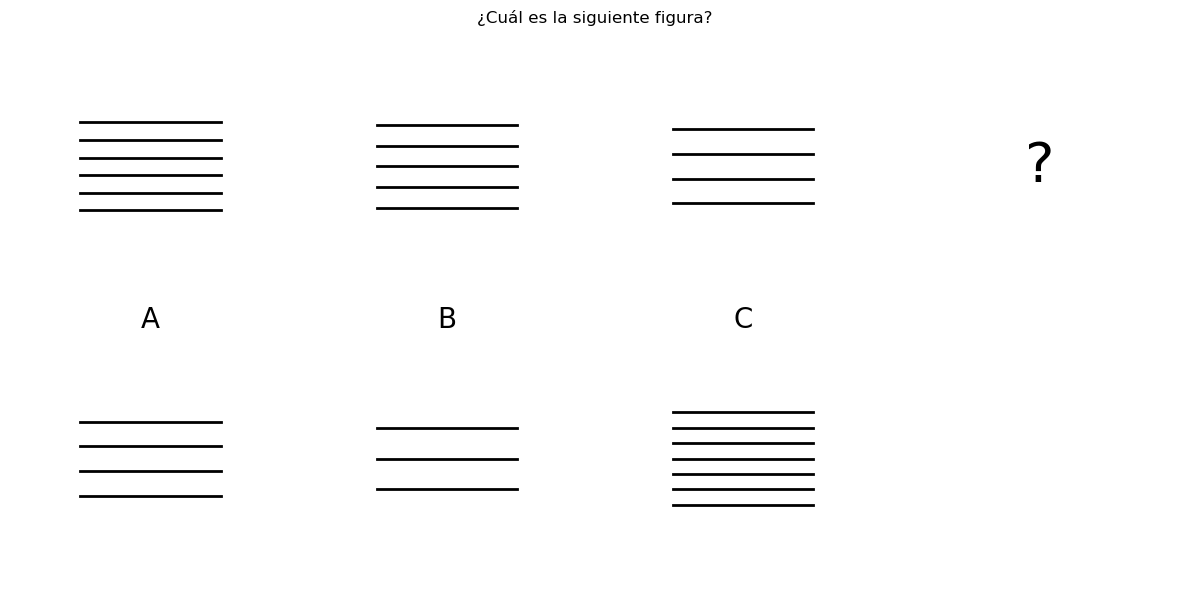

Elige A, B o C (o 'q' para salir):  B


¡Correcto!
El patrón es disminución de líneas por 1: 6, 5, 4... el siguiente es 3 líneas.


Nuevo ejercicio (tipo similar a increasing_sides del PDF):


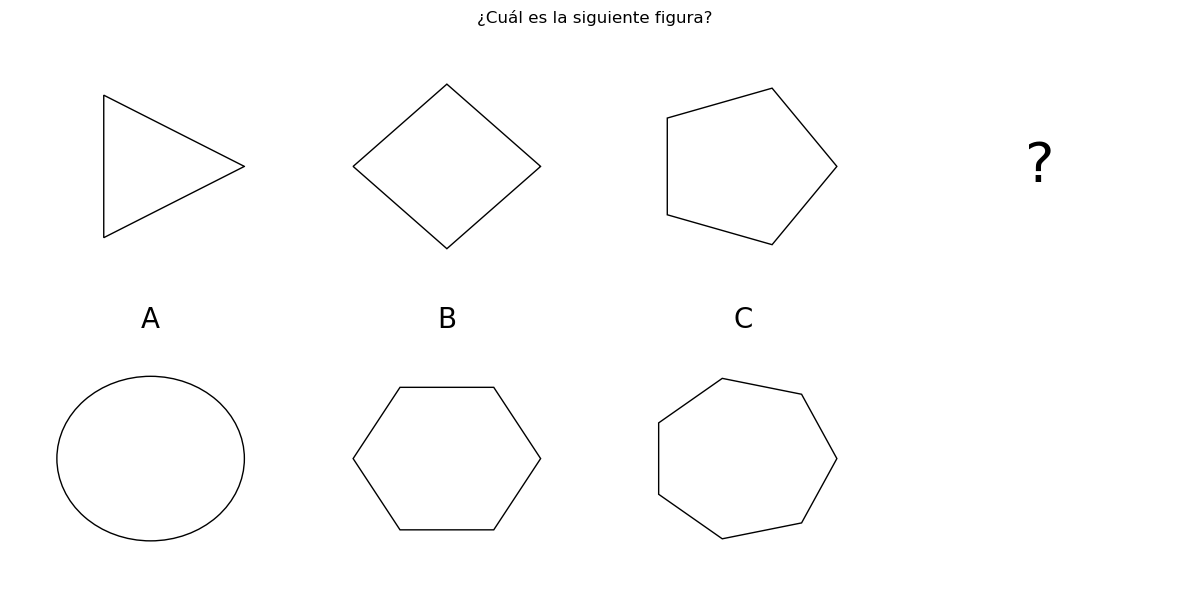

Elige A, B o C (o 'q' para salir):  B


¡Correcto!
El patrón es aumento de lados: 3, 4, 5... el siguiente es 6 lados.


Nuevo ejercicio (tipo similar a decreasing_lines del PDF):


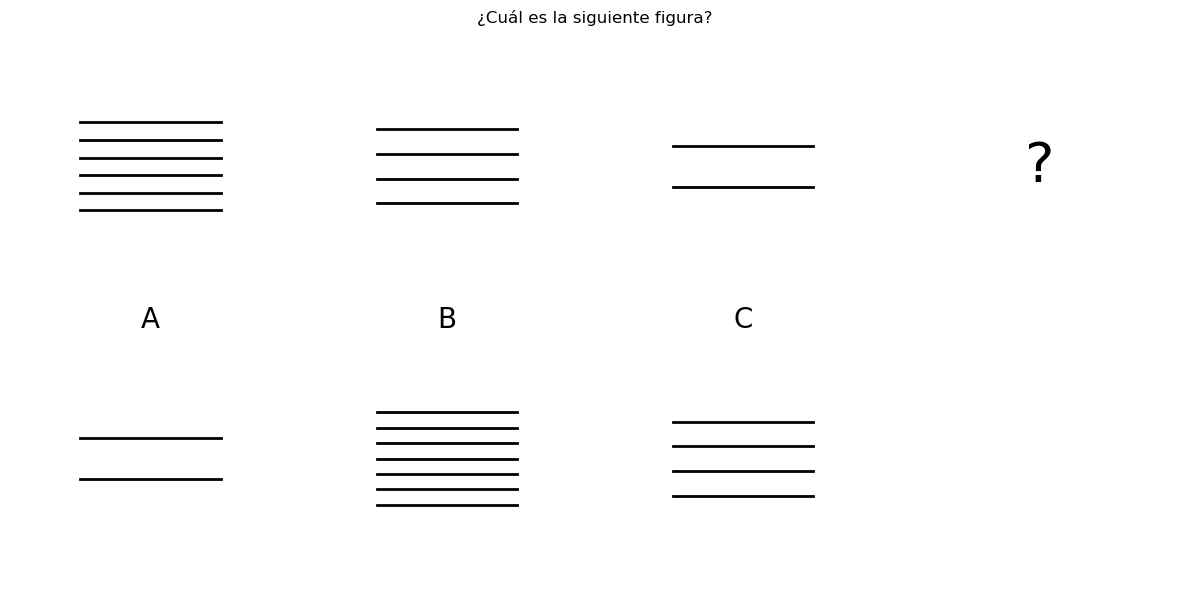

Elige A, B o C (o 'q' para salir):  A


Incorrecto.
El patrón es disminución de líneas por 2: 6, 4, 2... el siguiente es 4 líneas.


Nuevo ejercicio (tipo similar a rotating_circle del PDF):


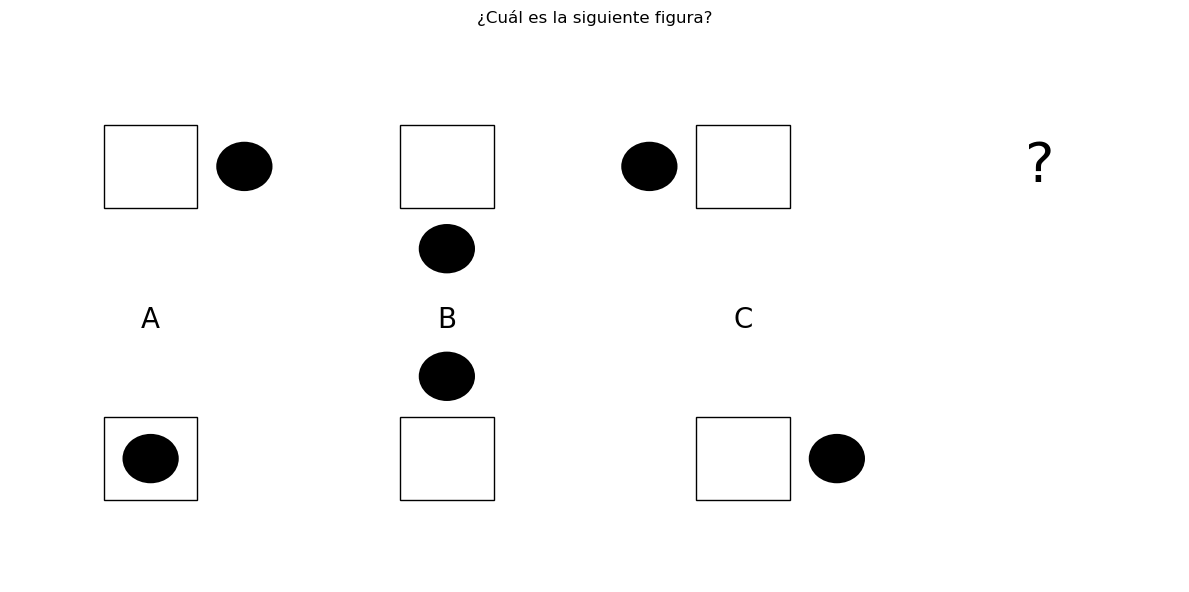

Elige A, B o C (o 'q' para salir):  B


¡Correcto!
El círculo rota clockwise: right, bottom, left... el siguiente es top.


Nuevo ejercicio (tipo similar a increasing_sides del PDF):


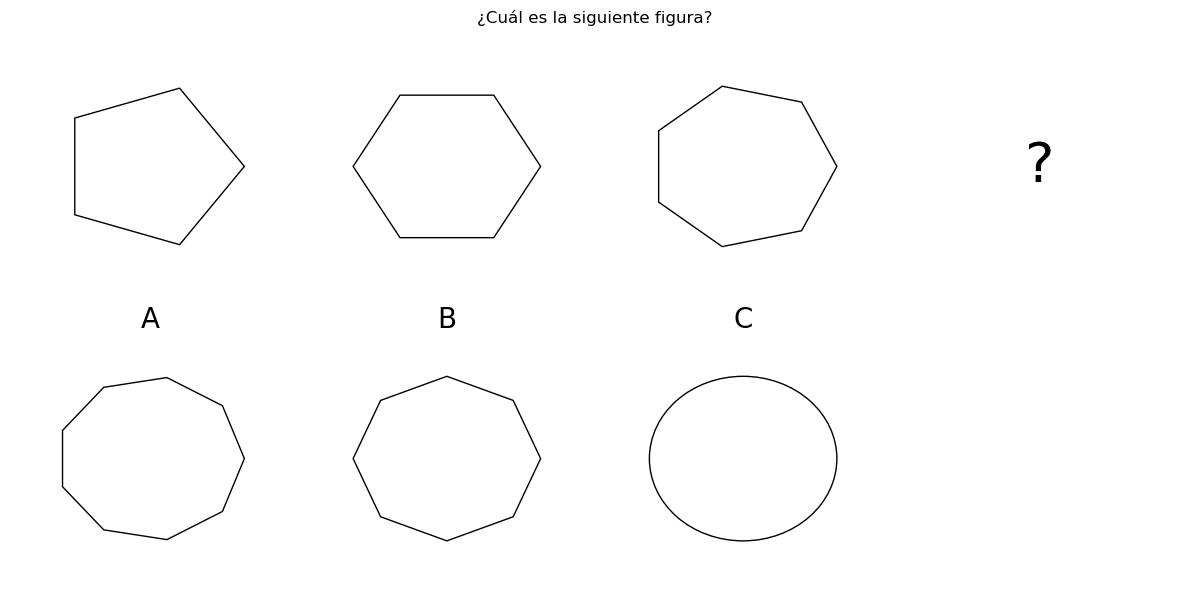

Elige A, B o C (o 'q' para salir):  B


¡Correcto!
El patrón es aumento de lados: 5, 6, 7... el siguiente es 8 lados.


Fin de la práctica. Porcentaje de aciertos: 80.00%


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, Circle
import numpy as np
import random

# Función para dibujar polígonos (para aumento de lados)
def draw_shape(ax, sides, color='white', edgecolor='black'):
    if sides < 3:
        ax.add_patch(Circle((0, 0), 1, facecolor=color, edgecolor=edgecolor))
    else:
        theta = np.linspace(0, 2 * np.pi, sides + 1)
        x = np.cos(theta)
        y = np.sin(theta)
        ax.add_patch(Polygon(list(zip(x, y)), facecolor=color, edgecolor=edgecolor))
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')

# Función para dibujar círculo rotando alrededor de cuadrado
def draw_rotating_circle(ax, position):
    ax.add_patch(Rectangle((-0.5, -0.5), 1, 1, facecolor='none', edgecolor='black'))
    radius = 0.3
    if position == 'bottom':
        center = (0, -1)
    elif position == 'left':
        center = (-1, 0)
    elif position == 'top':
        center = (0, 1)
    elif position == 'right':
        center = (1, 0)
    else:  # Wrong: overlapped in center
        center = (0, 0)
    ax.add_patch(Circle(center, radius, facecolor='black'))
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')

# Función para dibujar líneas decrecientes
def draw_lines(ax, num_lines):
    for i in range(num_lines):
        y = -0.5 + (i + 1) * (1 / (num_lines + 1))
        ax.plot([-0.5, 0.5], [y, y], color='black', linewidth=2)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')

# Genera un ejercicio aleatorio basado en el tipo
def generate_exercise(exercise_type):
    if exercise_type == 'increasing_sides':
        start_sides = random.randint(3, 5)
        sequence = [start_sides, start_sides + 1, start_sides + 2]
        correct = start_sides + 3
        wrong1 = start_sides + 4
        wrong2 = 0  # Círculo
        explanation = f'El patrón es aumento de lados: {sequence[0]}, {sequence[1]}, {sequence[2]}... el siguiente es {correct} lados.'

    elif exercise_type == 'rotating_circle':
        positions = ['bottom', 'left', 'top', 'right']
        start_idx = random.randint(0, 3)
        sequence = [positions[(start_idx + i) % 4] for i in range(3)]
        correct = positions[(start_idx + 3) % 4]
        wrong1 = random.choice(sequence)
        wrong2 = 'center'
        explanation = f'El círculo rota clockwise: {sequence[0]}, {sequence[1]}, {sequence[2]}... el siguiente es {correct}.'

    elif exercise_type == 'decreasing_lines':
        start_lines = random.randint(4, 6)
        decrement = random.choice([1, 2])
        sequence = [start_lines - i * decrement for i in range(3)]
        correct = start_lines - 3 * decrement if start_lines - 3 * decrement > 0 else start_lines - decrement  # Evitar negativo, reiniciar como en PDF
        wrong1 = sequence[-1]
        wrong2 = start_lines + 1
        explanation = f'El patrón es disminución de líneas por {decrement}: {sequence[0]}, {sequence[1]}, {sequence[2]}... el siguiente es {correct} líneas.'

    options_list = [correct, wrong1, wrong2]
    random.shuffle(options_list)
    options = {'A': options_list[0], 'B': options_list[1], 'C': options_list[2]}
    correct_option = [letter for letter, val in options.items() if val == correct][0]

    return sequence, options, correct_option, explanation, exercise_type

# Muestra todo en una sola figura
def display_exercise(sequence, options, exercise_type):
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    
    # Secuencia en la fila superior (3 figuras + ?)
    for i in range(3):
        if exercise_type == 'increasing_sides':
            draw_shape(axs[0, i], sequence[i])
        elif exercise_type == 'rotating_circle':
            draw_rotating_circle(axs[0, i], sequence[i])
        elif exercise_type == 'decreasing_lines':
            draw_lines(axs[0, i], sequence[i])
    axs[0, 3].text(0.5, 0.5, '?', fontsize=40, ha='center', va='center')
    axs[0, 3].axis('off')
    
    # Opciones en la fila inferior (A, B, C, y vacío)
    for i, letter in enumerate(['A', 'B', 'C']):
        item = options[letter]
        if exercise_type == 'increasing_sides':
            draw_shape(axs[1, i], item)
        elif exercise_type == 'rotating_circle':
            draw_rotating_circle(axs[1, i], item)
        elif exercise_type == 'decreasing_lines':
            draw_lines(axs[1, i], item)
        axs[1, i].set_title(letter, fontsize=20)
    axs[1, 3].axis('off')  # Espacio vacío
    
    plt.suptitle('¿Cuál es la siguiente figura?')
    plt.tight_layout()
    plt.show()

# Bucle principal del simulador
num_exercises = int(input("¿Cuántos ejercicios quieres practicar? "))
correct_count = 0

for _ in range(num_exercises):
    exercise_type = random.choice(['increasing_sides', 'rotating_circle', 'decreasing_lines'])
    sequence, options, correct_option, explanation, exercise_type = generate_exercise(exercise_type)
    print(f"Nuevo ejercicio (tipo similar a {exercise_type} del PDF):")
    display_exercise(sequence, options, exercise_type)
    answer = input("Elige A, B o C (o 'q' para salir): ").upper()
    if answer == 'Q':
        break
    if answer == correct_option:
        print("¡Correcto!")
        correct_count += 1
    else:
        print("Incorrecto.")
    print(explanation)
    print("\n")

# Resultado final
if num_exercises > 0:
    percentage = (correct_count / num_exercises) * 100
    print(f"Fin de la práctica. Porcentaje de aciertos: {percentage:.2f}%")

